![BTS](https://github.com/vfp1/bts-dsf-2020/raw/main/Logo-BTS.jpg)

# Session 1: Linear Regression




# Our first regression simple linear regression with diabetes

We will be using Linear Regression from Sklearn, which uses OLS type of fitting mechanism, see [here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html) for more info.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [3]:
# Load the diabetes dataset
diab_ds = datasets.load_diabetes()
diab = pd.DataFrame(diab_ds.data, columns=diab_ds.feature_names)
diab['target'] = diab_ds.target
diab.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [30]:
# We just take one variable for a linear simple regression
X = diab[['bmi']]
Y = diab['target']

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(353, 1)
(89, 1)
(353,)
(89,)


In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression()
lm = lr.fit(X_train, Y_train)


In [33]:
lm.coef_

array([938.57416386])

In [34]:
lm.intercept_

151.80775119241463

## Your turn: exercise in class

Plot the regression together with the features.

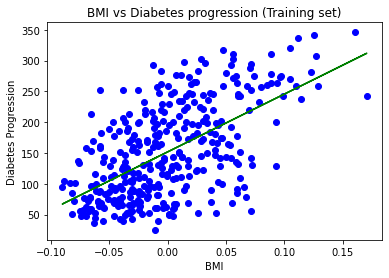

# Exploring Multivariate Regression and Colinearity through the The Boston Housing Dataset
We will take the Housing dataset which contains information about different houses in Boston. We can access this data from the scikit-learn library. There are 506 samples and 13 feature variables in this dataset. The objective is to **predict of prices of the houses using the given features**. First, we will import the required libraries and download the dataset. 

The rest of this notebook is a hands on example. Some of the code is not presented to you, and you need to come up with the solutions. Do not get worried. You will have the solutions next day, but you are expected to show the solutions during class. Happy coding!

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

In [44]:
# Load the diabetes dataset
boston_ds = datasets.load_boston()

/Users/miguelsanz/bts/venv/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housi

- See the content of the boston_dataset 

In [45]:
boston_ds.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

* data: contains the information for various houses

* target: prices of the house

* feature_names: names of the features

* DESCR: describes the dataset

Look at the Description of the dataset to see what it contains

In [46]:
print(boston_ds.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [47]:
boston = pd.DataFrame(boston_ds.data, columns=boston_ds.feature_names)
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Note that the target variable **Median value of owner-occupied homes in $1000's** is missing from data. Read the targer variable and add it to the dataframe.

In [48]:
boston['MEDV'] = boston_ds.target

### Data Preprocessing

After loading the data, it’s a good practice to see if there are any missing values in the data. Count the number of missing values for each feature using isnull()

In [49]:
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

## Exploratory Data Analysis

Exploratory Data Analysis is a very important step before training the model. In this section, we will use some visualizations to understand the relationship of the target variable with other features.

Let’s first plot the distribution of the target variable **MDEV**. You may plot it with different libraries, try using seaborn for a nicer plot. What distribution follows the data? Can you detect any outliers?

<AxesSubplot:xlabel='MEDV', ylabel='Count'>

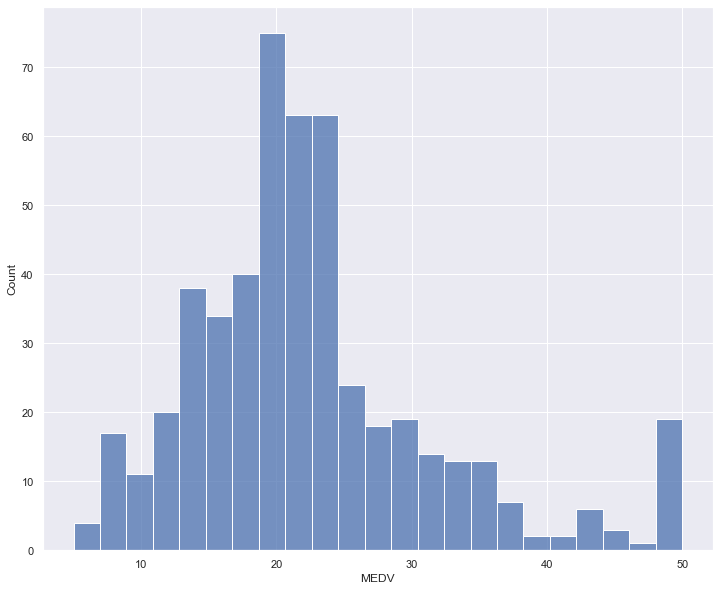

In [101]:
f, ax = plt.subplots(figsize=(12, 10))
sns.histplot(boston['MEDV'], ax=ax)

- Create a pairplot, it allows us to see both distribution of single variables and relationships between two variables.

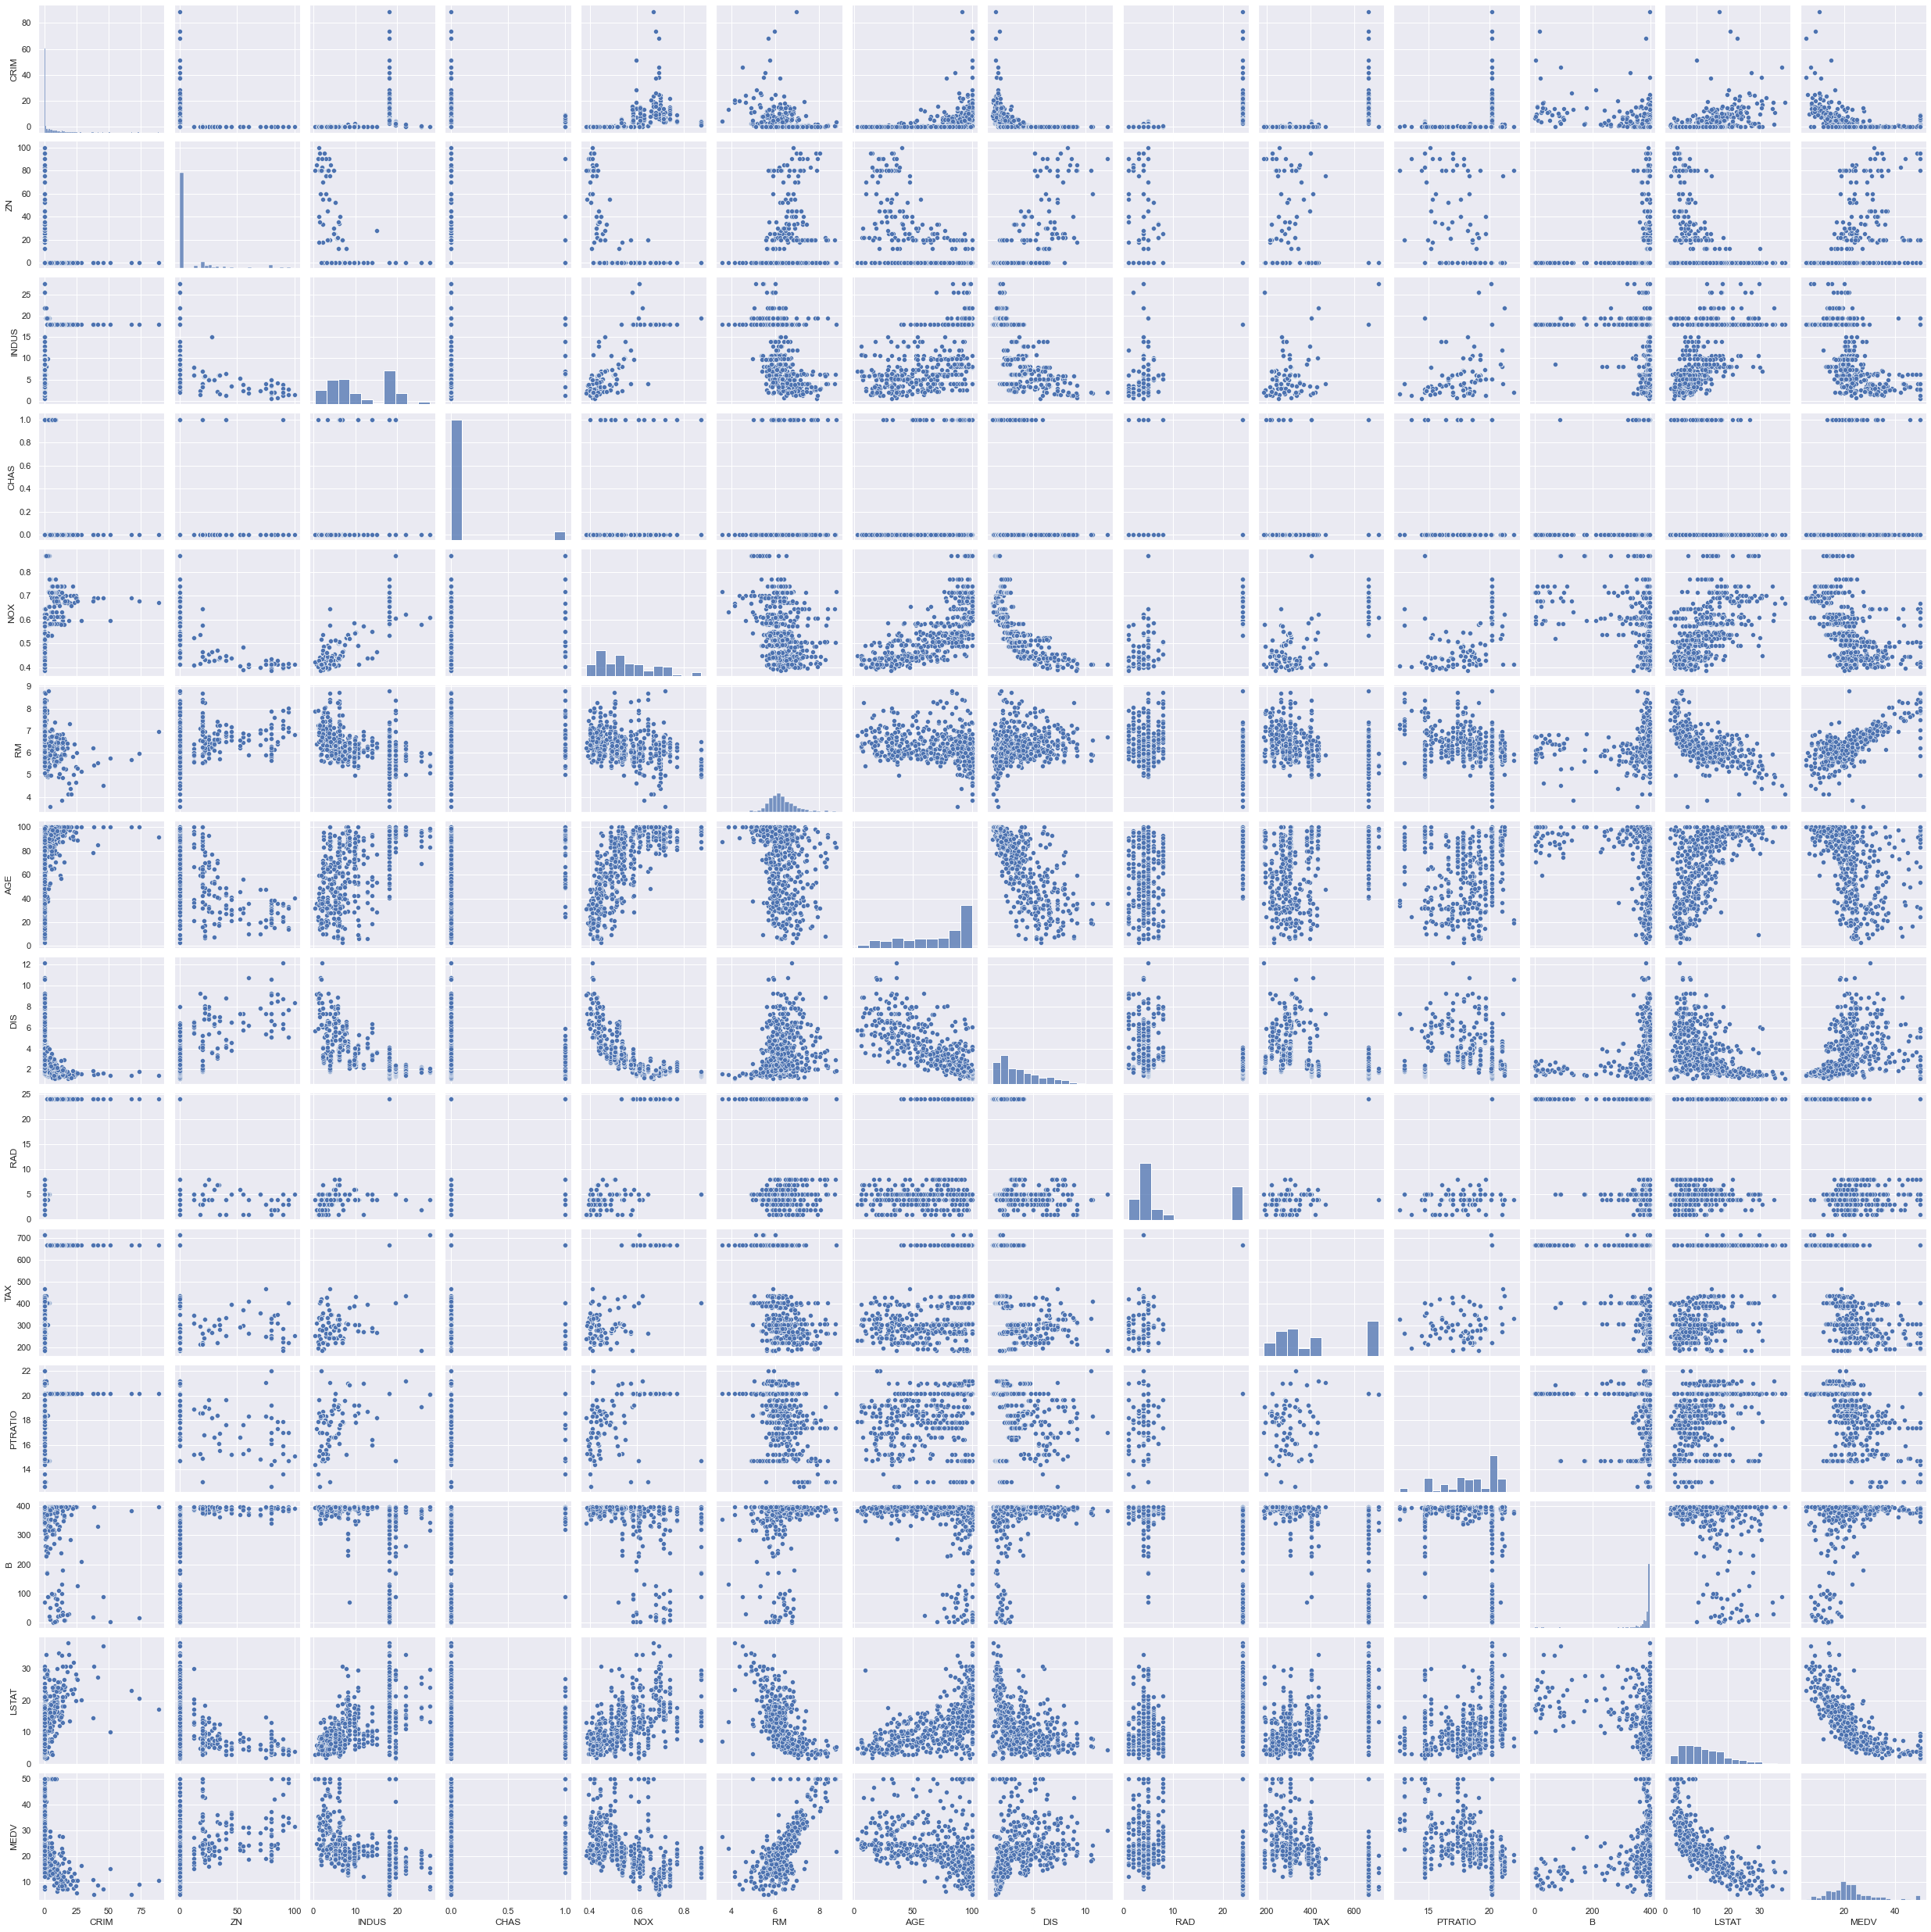

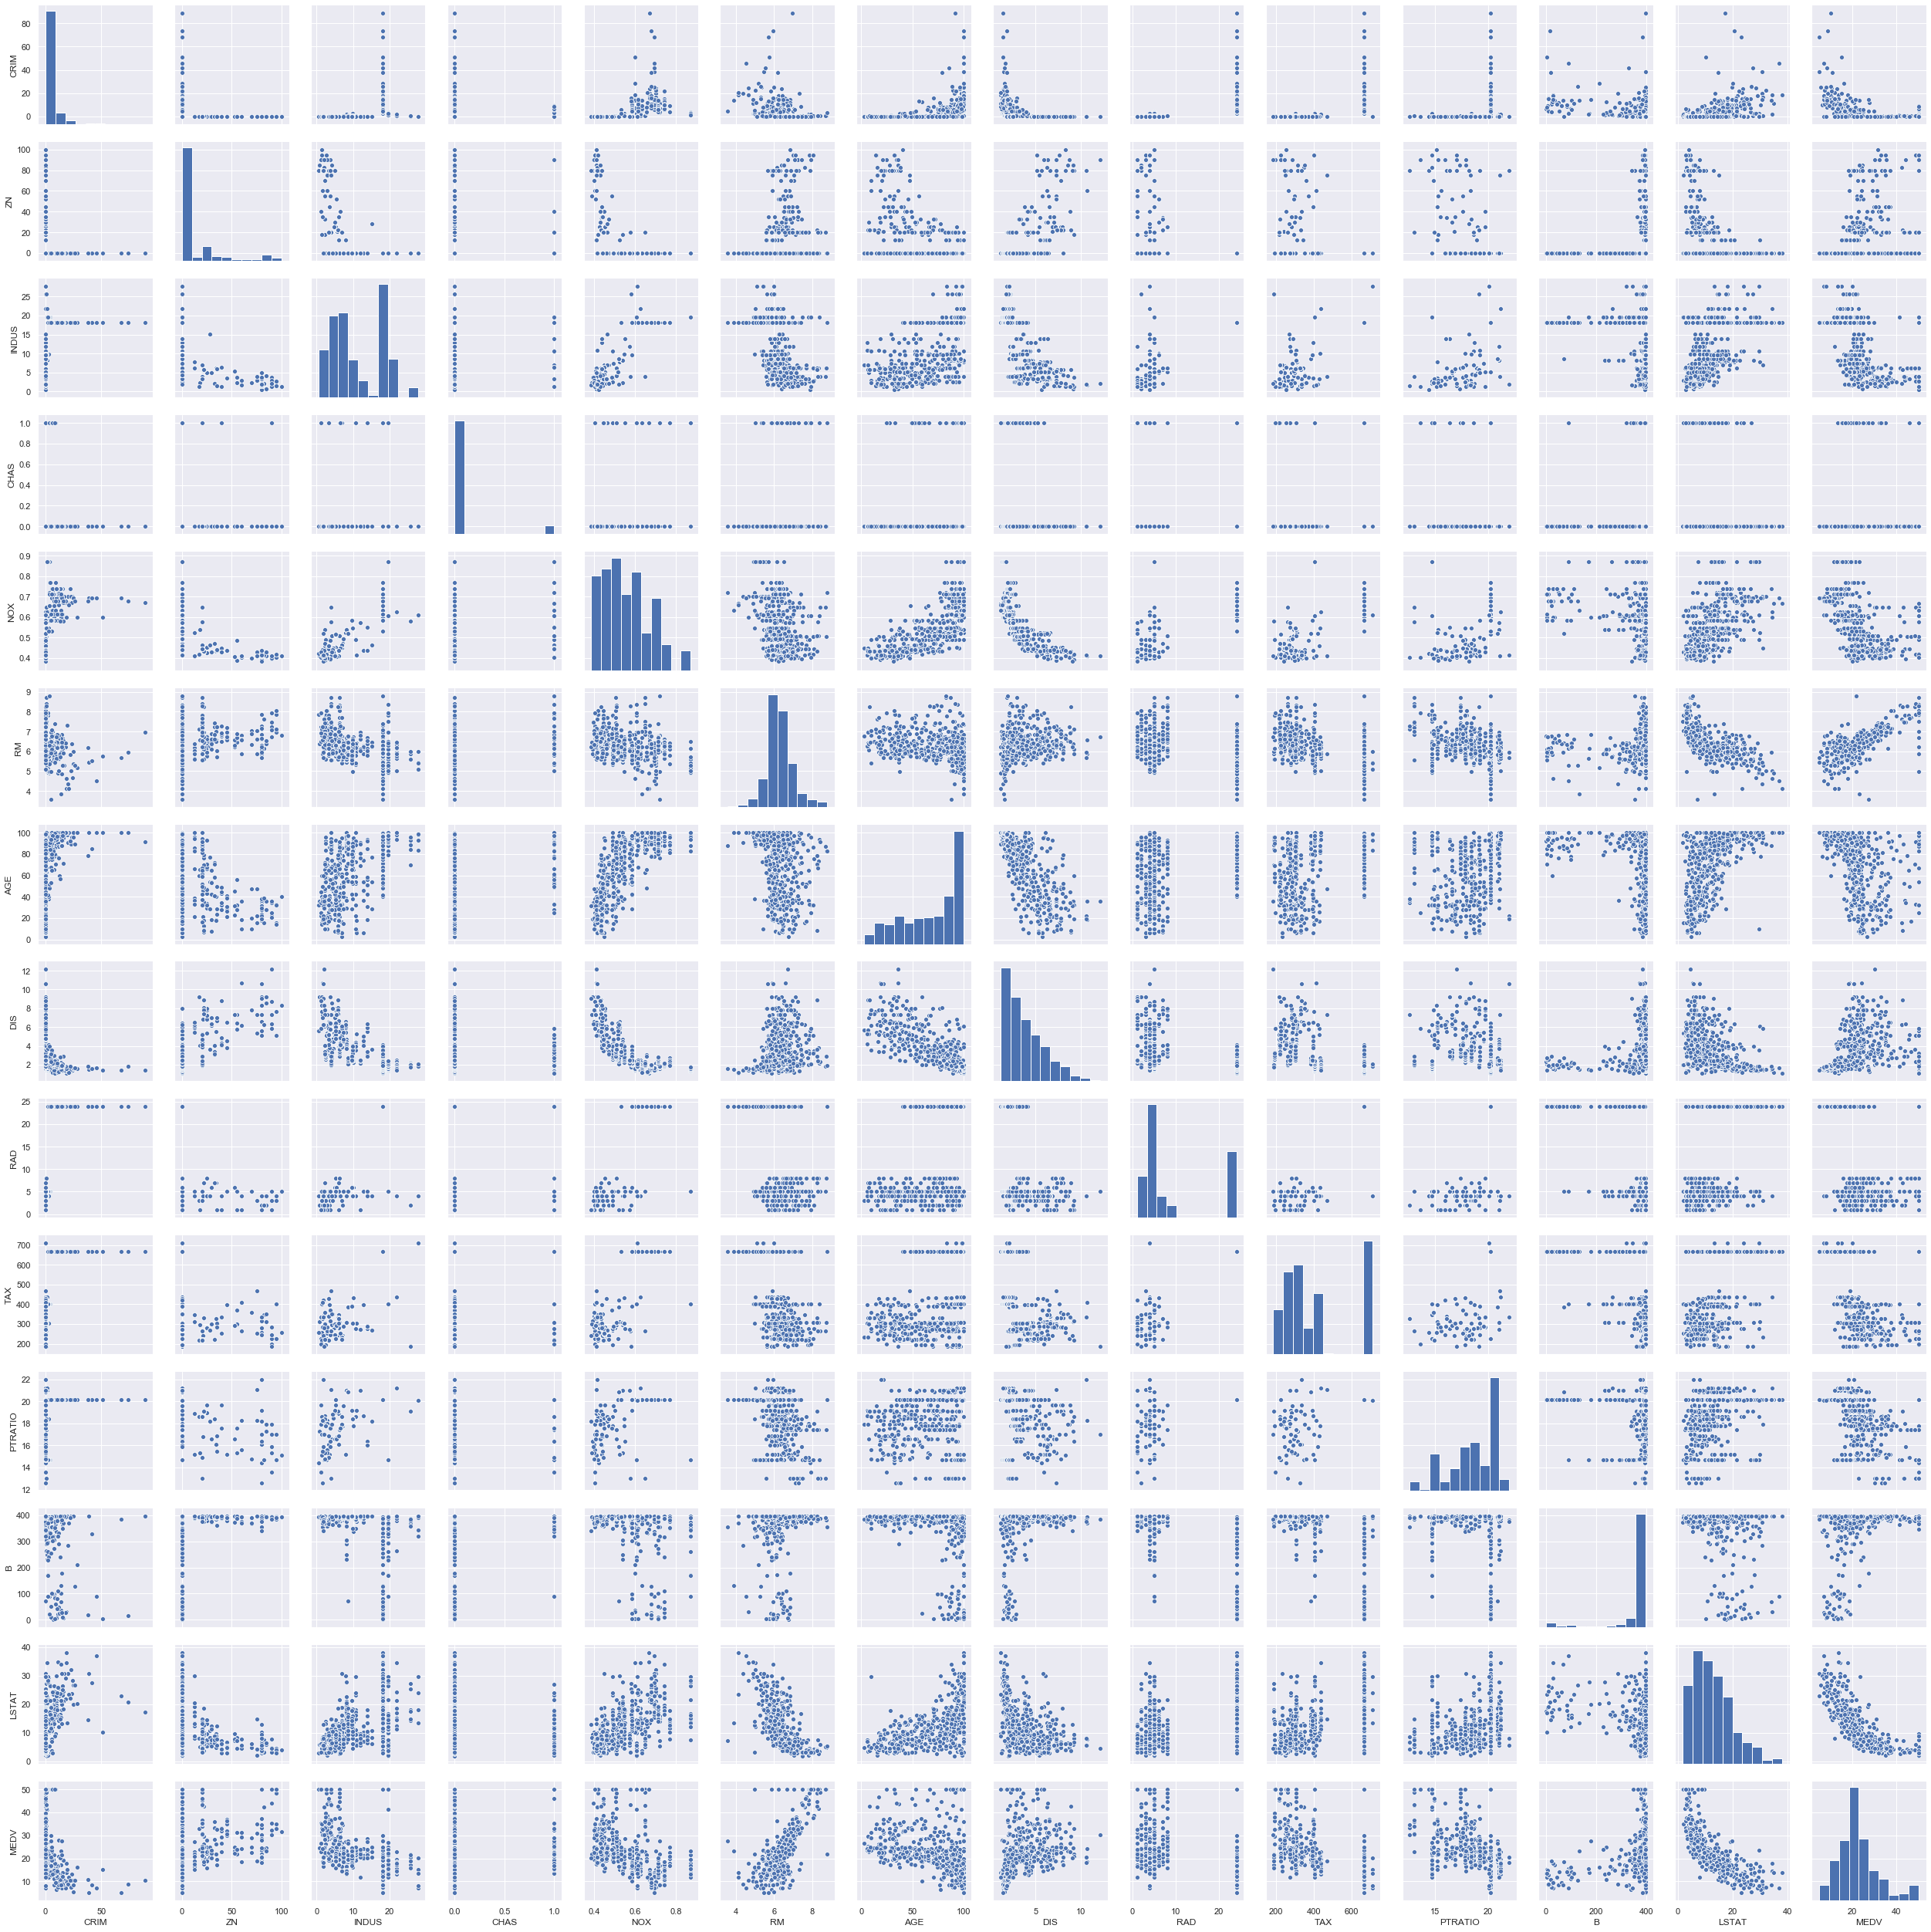

Next, we create a correlation matrix that measures the linear relationships between the variables. You may compute the correlation matrix using the corr function from the pandas dataframe library. Use the heatmap function from the seaborn library to plot the correlation matrix. Find the way to display the correlation numbers on each cell. What does a correlation of 1 mean, and a correlation of -1, and 0?. What properties does the correlation matrix have? Explain the diagonal.

<AxesSubplot:>

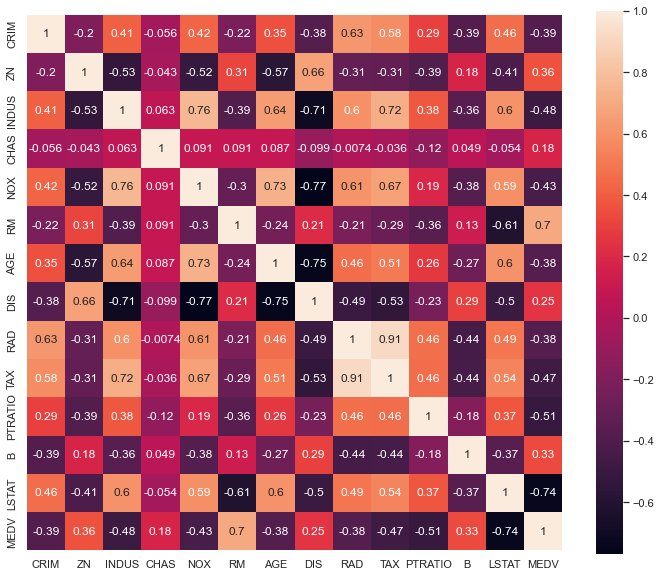

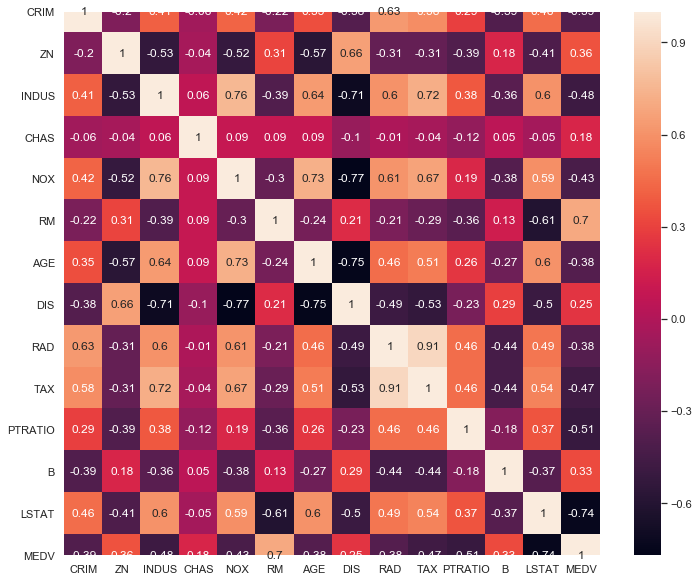

In [ ]:
correlation_matrix

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.00,-0.20,0.41,-0.06,0.42,-0.22,0.35,-0.38,0.63,0.58,0.29,-0.39,0.46,-0.39
ZN,-0.20,1.00,-0.53,-0.04,-0.52,0.31,-0.57,0.66,-0.31,-0.31,-0.39,0.18,-0.41,0.36
INDUS,0.41,-0.53,1.00,0.06,0.76,-0.39,0.64,-0.71,0.60,0.72,0.38,-0.36,0.60,-0.48
CHAS,-0.06,-0.04,0.06,1.00,0.09,0.09,0.09,-0.10,-0.01,-0.04,-0.12,0.05,-0.05,0.18
NOX,0.42,-0.52,0.76,0.09,1.00,-0.30,0.73,-0.77,0.61,0.67,0.19,-0.38,0.59,-0.43
RM,-0.22,0.31,-0.39,0.09,-0.30,1.00,-0.24,0.21,-0.21,-0.29,-0.36,0.13,-0.61,0.70
AGE,0.35,-0.57,0.64,0.09,0.73,-0.24,1.00,-0.75,0.46,0.51,0.26,-0.27,0.60,-0.38
DIS,-0.38,0.66,-0.71,-0.10,-0.77,0.21,-0.75,1.00,-0.49,-0.53,-0.23,0.29,-0.50,0.25
RAD,0.63,-0.31,0.60,-0.01,0.61,-0.21,0.46,-0.49,1.00,0.91,0.46,-0.44,0.49,-0.38
TAX,0.58,-0.31,0.72,-0.04,0.67,-0.29,0.51,-0.53,0.91,1.00,0.46,-0.44,0.54,-0.47


## Manual feature selection

To fit a linear regression model, we select those features which have a high correlation with our target variable MEDV. By looking at the above plots which are the variables with strongest correlation to MEDV?

Hint: check positive or negative correlations to MEDV in the table above

## Multi-co-linearity

An important point in selecting features for a linear regression model is to check for multi-co-linearity. That is, we should not select feature pairs which are strongly correlated to each other. Let us see simple case with two (independent) variables to see why:

Consider the simplest case where $Y$ is regressed against $X$ and $Z$ and where $X$ and $Z$ are highly positively correlated. Then the effect of $X$ on $Y$ is hard to distinguish from the effect of $Z$ on $Y$ because any increase in $X$ tends to be associated with an increase in $Z$.

Another way to look at this is to consider the equation. If we write 

$$Y=b_0+b_1X+b_2Z+\epsilon,$$

then the coefficient $b_1$ is the increase in $Y$ for every unit increase in $X$ while holding $Z$ constant. But in practice, it is often impossible to hold $Z$ constant and the positive correlation between $X$ and $Z$ mean that a unit increase in $X$ is usually accompanied by some increase in $Z$ at the same time.

Still confused? [A good example of multicolinarity in football](https://blog.minitab.com/blog/understanding-statistics/handling-multicollinearity-in-regression-analysis)

### Which features have strong correlation?

Finally, suggest two features to use for the regression. Use a scatter plot to see how these features vary with MEDV. Plot them using ```plt.subplot()``` and put the axis titles for each subplot.

Then create 2 simple linear regression models (1 with each feature) and one multivariate model that uses both features.

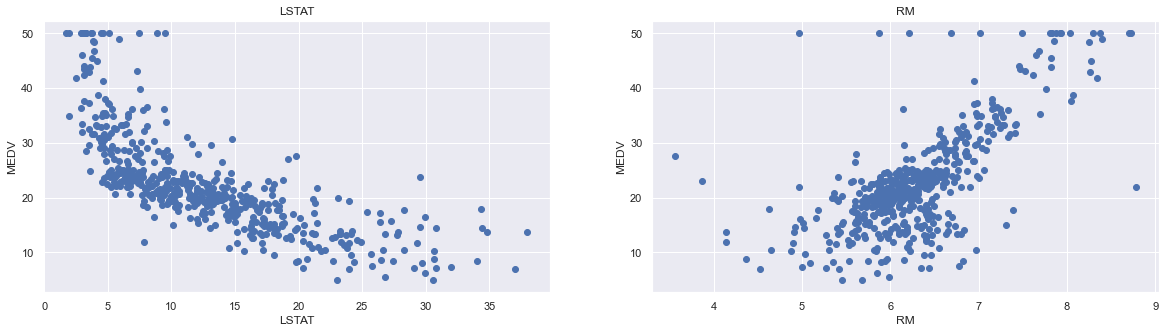

In [76]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel('MEDV')

What is the relationship between MDEV and LSTAT or RM? Does that make common sense given their descriptions? Can you detect any peculiarities in the data?

## Simple Models LSTAT VS MEDV

#### Preparing the data for training

In [82]:
X=boston[['LSTAT']]
Y=boston['MEDV']

In [ ]:
X = # Put here the indipendent variable
Y = # Put here the Dipendent variable

### Training and test splits
Next, we split the data into training and testing sets. We train the model with 80% of the samples and test with the remaining 20%. We do this to assess the model’s performance on unseen data. To split the data you may use ```scikit-learn library```. Finally print the sizes of our training and test set to verify if the splitting has occurred properly.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = 
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 1)
(102, 1)
(404,)
(102,)


### Training and testing the model
Use again ```scikit-learn``` to train a linear regression model on the training set.

In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression()

In [ ]:
lin_model.intercept_

34.87291567862843

In [ ]:
coeff_df = pd.DataFrame(lin_model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
LSTAT,-0.979812


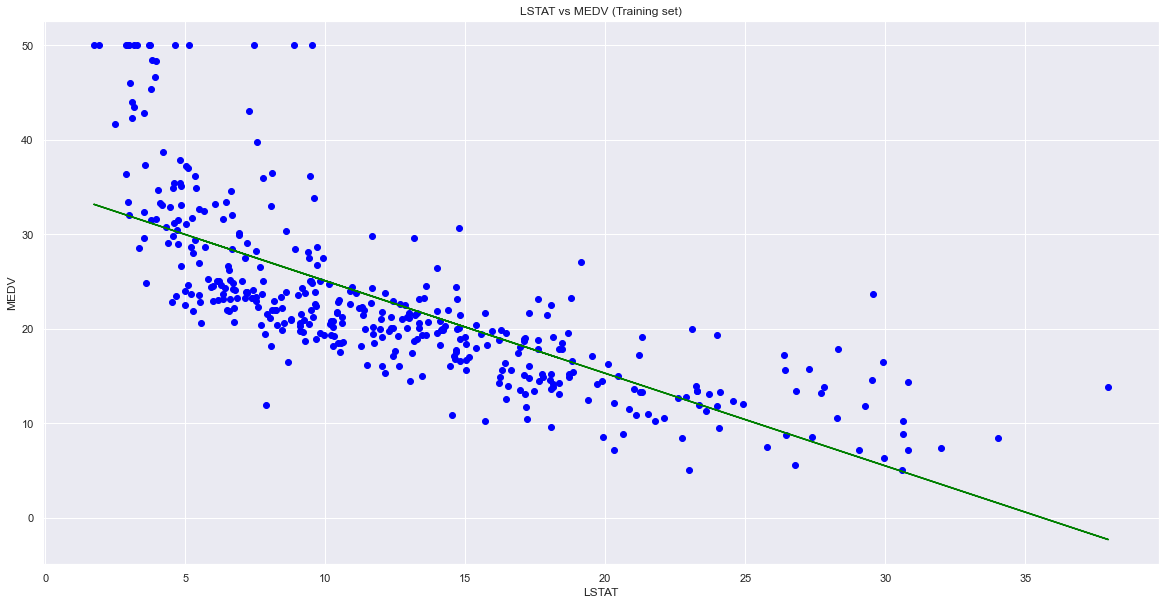

In [91]:
plt.figure(figsize=(20, 10))
plt.scatter(X_train, Y_train, color = "blue")
plt.plot(X_train, lin_model.predict(X_train), color = "green")
plt.title("LSTAT vs MEDV (Training set)")
plt.xlabel("LSTAT")
plt.ylabel("MEDV")
plt.show()

- **Which value has the slope of the model? What does it mean?**
- **Is there a positive or a negative relationship between the two variables?**

Write here your answer




## Predictions from our Model

Let's grab predictions off our test set and see how well it did!

In [92]:
predictions = 

#### Plot Actual values VS Predictions.
Perfect straight line would be perfectly correct predictions

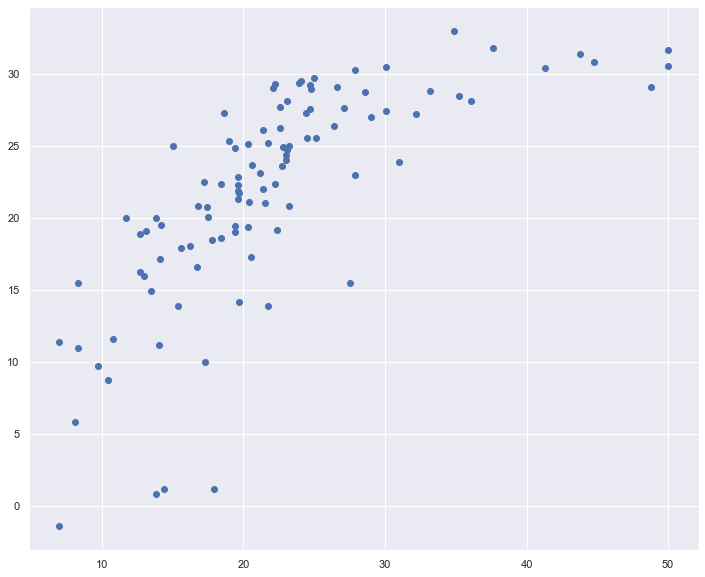

In [ ]:
plt.scatter(Y_test,predictions)

### Creating the histogram of our residuals
- Remember the residual is the difference between actual value and predicted value.
- Residuals are normally distributed. If you have normally distributed residuals, it means your model is a correct choice for the data. 

<AxesSubplot:xlabel='MEDV', ylabel='Count'>

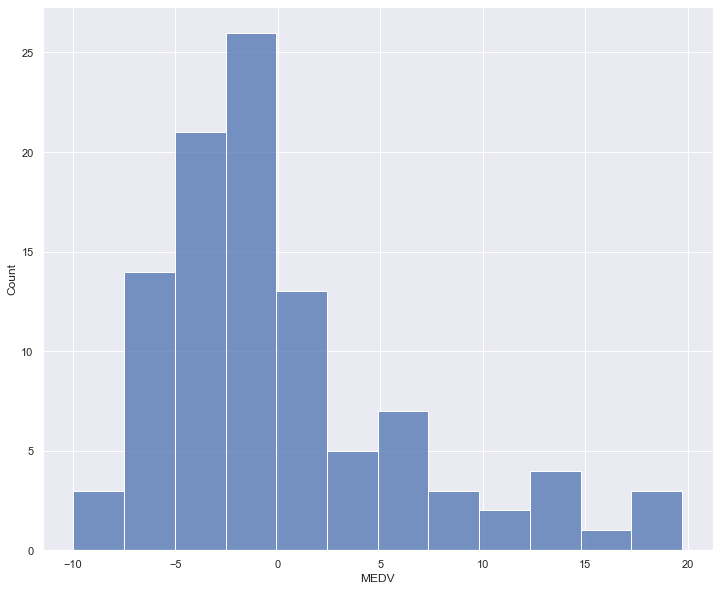

### Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

All of the above functions are **loss functions**, because we want to minimize them.


Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.


Another used metric is:
**R Squared** (R^2) explains how close the data are to the fitted regression line.:


$$1-\frac{\sum_{i=1}^n(y_i-\hat{y}_i)^2}{\sum_{i=1}^n(y_i-\overline{y})^2}$$



- **R2** is the ratio between how good our model is vs how good is the naive mean model. It is always going to be between -∞ and 1.



### Evaluation using sklean

In [ ]:
from sklearn import metrics

y_train_predict = lin_model.predict(X_train)

print("The model performance for training set")
##Add code here to compute the metrics


print("\n")

y_test_predict = lin_model.predict(X_test)
print("The model performance for testing set")

##Add code here to compute the metrics




The model performance for training set
MAE: 4.50101768097332
MSE: 38.45801898706332
RMSE: 6.201452973865344
R2 Score: 0.5523019908037391


The model performance for testing set
MAE: 4.552097941955834
MSE: 38.82182901428658
RMSE: 6.2307165730986815
R2 Score: 0.5041523728903132


## Simple Model 2: RM VS MEDV

#### Preparing the data for training

In [ ]:
X = 
Y = 

### Training and test splits
Next, we split the data into training and testing sets. We train the model with 80% of the samples and test with the remaining 20%. We do this to assess the model’s performance on unseen data. To split the data you may use ```scikit-learn library```. Finally print the sizes of our training and test set to verify if the splitting has occurred properly.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = 
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 1)
(102, 1)
(404,)
(102,)


### Training and testing the model
Use again ```scikit-learn``` to train a linear regression model on the training set.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
lin_model.intercept_

-32.839129906011266

In [ ]:
coeff_df = pd.DataFrame(lin_model.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
RM,8.823456


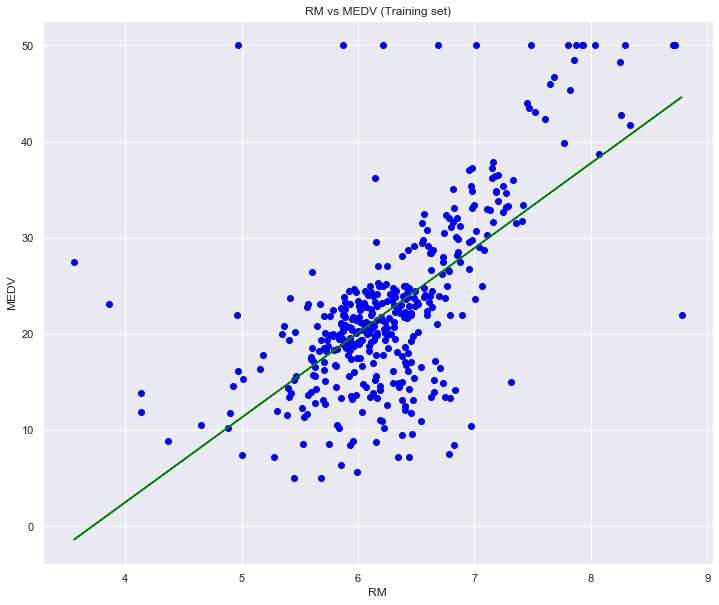

In [ ]:
plt.scatter(X_train, Y_train, color = "blue")
plt.plot(X_train, lin_model.predict(X_train), color = "green")
plt.title("RM vs MEDV (Training set)")
plt.xlabel("RM")
plt.ylabel("MEDV")
plt.show()

- **What is the value of the slope of the model? How do you interpret it?**
- **Is there a positive or a negative relationship between the two variables?**

## Predictions from the Model

Let's grab predictions off our test set and see how well it did!

In [ ]:
predictions = 

#### Plot Actual values VS Predictions.
Perfect straight line would be perfectly correct predictions

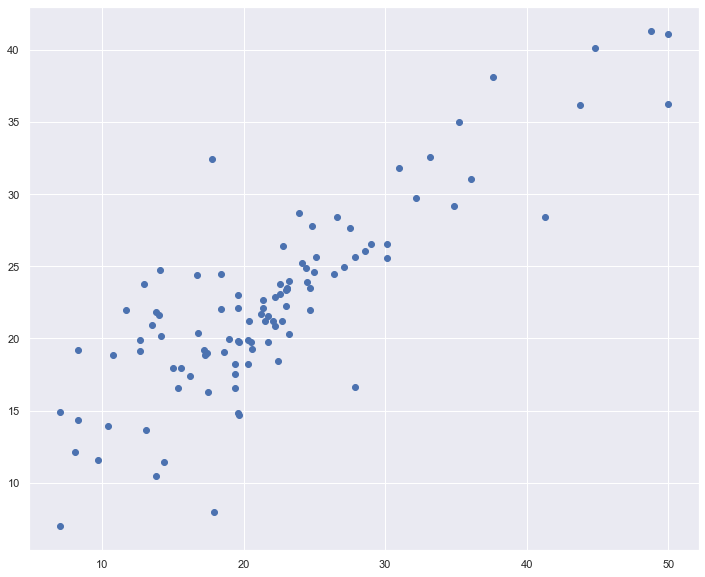

In [ ]:
plt.scatter(Y_test,predictions)

### Creating the histogram of our residuals
- Residuals are normally distributed. If you have normally distributed residuals, it means your model is a correct choice for the data. 

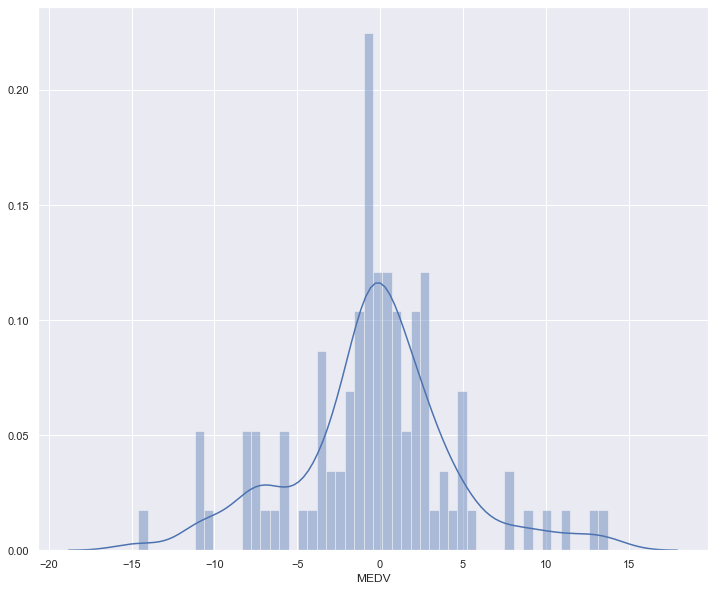

In [ ]:
sns.distplot((Y_test-predictions),bins=50);

### Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

All of the above functions are **loss functions**, because we want to minimize them.


Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.


Another used metric is:
**R Squared** (R^2) explains how close the data are to the fitted regression line.:


$$1-\frac{\sum_{i=1}^n(y_i-\hat{y}_i)^2}{\sum_{i=1}^n(y_i-\overline{y})^2}$$



- **R2** is the ratio between how good our model is vs how good is the naive mean model. It is always going to be between -∞ and 1.




Now evaluate the model using RMSE and R2-score.

### Evaluation using sklean

In [ ]:
from sklearn import metrics

y_train_predict = lin_model.predict(X_train)

print("The model performance for training set")
#Put your code here


print("\n")

y_test_predict = lin_model.predict(X_test)
print("The model performance for testing set")
#Put your code here



The model performance for training set
MAE: 4.710645485019309
MSE: 48.612648648611334
RMSE: 6.972277149440585
R2 Score: 0.4340897790637215


The model performance for testing set
MAE: 3.4700049049355406
MSE: 23.970455527991305
RMSE: 4.895963186952216
R2 Score: 0.6938399401553497


## Multivariate model

### Preparing the data for training
Concatenate the LSTAT and RM columns (you can use ```np.c_``` provided by the numpy library or any other method you prefer, such as just doing a column drop in pandas).

In [ ]:
X = 
Y =

### Training and test splits
Next, we split the data into training and testing sets. We train the model with 80% of the samples and test with the remaining 20%. We do this to assess the model’s performance on unseen data. To split the data you may use ```scikit-learn library```. Finally print the sizes of our training and test set to verify if the splitting has occurred properly.

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = 
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

(404, 2)
(102, 2)
(404,)
(102,)


### Training and testing the model
Use again ```scikit-learn``` to train a linear regression model on the training set.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error



LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Evaluation using sklean

In [ ]:
from sklearn import metrics

y_train_predict = lin_model.predict(X_train)

print("The model performance for training set")
#Put your coe here


print("\n")

y_test_predict = lin_model.predict(X_test)
print("The model performance for testing set")
#Put your coe here



The model performance for training set
MAE: 4.031115615178024
MSE: 31.777227140320214
RMSE: 5.6371293350711955
R2 Score: 0.6300745149331701


The model performance for testing set
MAE: 3.7913102133431047
MSE: 26.392886822666085
RMSE: 5.137400784702911
R2 Score: 0.6628996975186953


## Further exercises

One good exercise is to do a multivariate regression with highly correlated dependant variables. Try that out and see how does it affect evaluation metrics, you can pick those high correlations from the confusion matrix you just did. 

Is always better to add all the data to a model?